# Lab 5 writeup

Speedup measurement

```
-> % ./evaluate.sh                 [main↑2|✚4…10]
-------- Sanity check of reference implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
reference, 3071.145996, 307.114014, 10, 0.853571

-------- Sanity check of loop_unrolling implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
loop_unrolling, 2712.159912, 271.216003, 10, 0.966551

-------- Sanity check of multithreading implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
multithreading, 774.859009, 77.485001, 10, 3.383119

-------- Sanity check of simd_programming implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
simd_programming, 1294.862061, 129.485992, 10, 2.024494

-------- Sanity check of multithreading_loop_unrolling implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
multithreading_loop_unrolling, 677.382019, 67.737999, 10, 3.869958

-------- Sanity check of all_techniques implementation: Passed! -------- 
Section, Total time(ms), Average time(ms), Count, GOPs
all_techniques, 137.345993, 13.734000, 10, 19.086395

All tests completed!

```

In [17]:
speedup_gops = {
    'reference': 0.853571,
    'loop_unrolling': 0.966551,
    'multithreading': 3.383119,
    "simd_programming": 2.024494,
    "multithreading_loop_unrolling": 3.869958,
    "all_techniques": 19.086395,
}

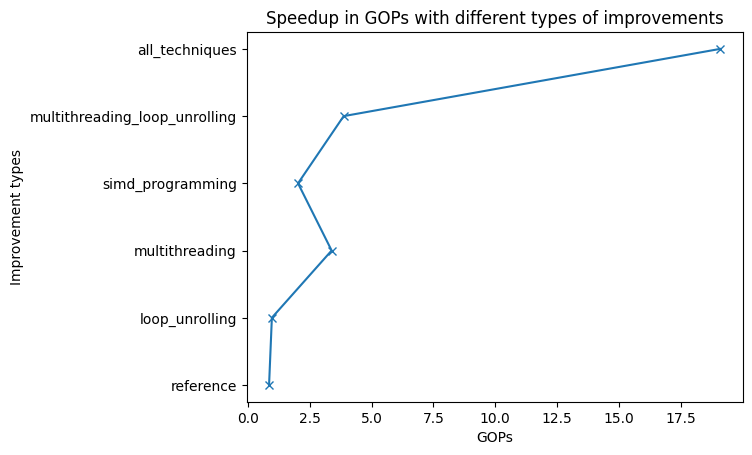

In [18]:
# plot the speedup, add dot for the speedup of 1 thread

import matplotlib.pyplot as plt
def plot_speedup(speedup_x, desc, flip=True):
    if flip:
        plt.plot(speedup_x.values(), speedup_x.keys(), 'x-')
        plt.ylabel('Improvement types')
        plt.xlabel('GOPs')
        plt.title(desc)
        plt.show()
    else:
        plt.plot(speedup_x.keys(), speedup_x.values(), 'x-')
        plt.xlabel('Improvement types')
        plt.ylabel('GOPs')
        plt.title(desc)
        plt.show()
    
desc = 'Speedup in GOPs with different types of improvements'
plot_speedup(speedup_gops, desc)

In [27]:
def compute_speedup(benchmarks, desc, base='reference'):
    naive = benchmarks[base]
    print(desc)
    print("-"*40)
    for benchmark in benchmarks:
        speedup = benchmarks[benchmark]/ naive
        # print(benchmark, speedup)
        print(f"{benchmark}\t: {speedup:.2f}x (GOPs: {benchmarks[benchmark]})")

In [28]:
compute_speedup(speedup_gops, "Speedup in GOPs wrt reference")

Speedup in GOPs wrt reference
----------------------------------------
reference	: 1.00x (GOPs: 0.853571)
loop_unrolling	: 1.13x (GOPs: 0.966551)
multithreading	: 3.96x (GOPs: 3.383119)
simd_programming	: 2.37x (GOPs: 2.024494)
multithreading_loop_unrolling	: 4.53x (GOPs: 3.869958)
all_techniques	: 22.36x (GOPs: 19.086395)


**Final thoughts:**

All techniques include 4 thread and 4x more SIMD implementations, so the GOPs improvement in `all_techniques` are multiplicative improvement with multithreading and SIMD.

## NOTE

Main llama code is `Int4llamaDecoder.cc` and internal layers are implemented by `Int4llamaDecoderLayer.cc`.

`LLaMAGenerate.cc` is the top level code to take in the input and output file names and call the llama decoder.